In [ ]:
# Import numpy for mathematical operations
import numpy as np

# Import pandas to perform operations on tables
import pandas as pd

# Import matplotlib for visualization tools
import matplotlib.pyplot as plt

# Import seaborn for advanced visualization tools
import seaborn as sns

# Import Power Transformer for transformation
from sklearn.preprocessing import PowerTransformer

# Import Standard Scaler for scaling independent variables
from sklearn.preprocessing import StandardScaler

# Import categorical encoder to convert categorical columns to numerical
import category_encoders as ce

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Import train test split to split the dataset for training and testing
from sklearn.model_selection import train_test_split

# Import metrics for evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Import the dataset
df = pd.read_csv("updated_full_data.csv")

<ipython-input-3-f0e861f0efc2>:1: DtypeWarning: Columns (17,30,79,87,89,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Hospital Stay Prediction/Reduced columns.csv")


In [ ]:
# Drop the columns which has more than half records (700000) as null values
drop_columns = []
for column in df.columns:
    if df[column].isnull().sum()>700000:
        drop_columns.append(column)

In [ ]:
df.head()

,Unnamed: 0,FiscalYear,FiscalQuarterText,FiscalPeriod,YearMonthText,MonthNameAbbr,StartofMonth,WeekDayAbbr,Flag_Weekend,ReportDate,...,next_EDvisit_in30d_case,next_EDvisit_in14d_case,days_btw_nextvisit,hours_btw_nextvisit,next_EDvisit_in48h_case,next_EDvisit_MRDx_code,next_EDvisit_MRDx_desc,QBP_class,epic_csn,stay_duration_hours
0,0,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,...,YE15654/17,0,0,448.0,10766.0,0,R51,Headache,2016001,4.583333
1,1,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,...,NaN,0,0,NaN,NaN,0,NaN,NaN,2016001,1.233333
2,2,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,...,HE000298/16,1,1,1.0,31.0,1,N832,Other and unspecified ovarian cysts,2016001,5.366667
3,3,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,...,YE01603/16,1,1,8.0,213.0,0,H669,"Otitis media, unspecified",2016001,1.416667
4,4,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,...,HE043183/16,0,0,212.0,5101.0,0,M2551,"Pain in joint, shoulder region",2016001,7.416667


In [ ]:
# dropping index column
df = df.drop(df.columns[0], axis=1)

In [ ]:
# Drop columns which has information about the target (LOS)
df.drop(df[['Time_ED_CDU_LOS_mins', 'Time_ED_PIA_LOS_mins', 'Time_ED_Total_LOS_mins','Time_ED_CDU_LOS_hrs', 'Time_ED_PIA_LOS_hrs','Time_ED_PIA2Disposition_LOS_mins']],inplace = True, axis=1)

In [ ]:
df.columns

Index(['FiscalYear', 'FiscalQuarterText', 'FiscalPeriod', 'YearMonthText',
       'MonthNameAbbr', 'StartofMonth', 'WeekDayAbbr', 'Flag_Weekend',
       'ReportDate', 'hosp_inst_num',
       ...
       'primary_procedure_date', 'next_EDvisit_visit_num',
       'next_EDvisit_in30d_case', 'next_EDvisit_in14d_case',
       'days_btw_nextvisit', 'hours_btw_nextvisit', 'next_EDvisit_MRDx_code',
       'next_EDvisit_MRDx_desc', 'QBP_class', 'epic_csn'],
      dtype='object', length=131)

In [ ]:
# Drop 'next_EDvisit_in48h_case' since another column 'hours_btw_nextvisit' is also containing the same information
df.drop(df[['next_EDvisit_in48h_case']],inplace = True, axis=1)

In [ ]:
# Save the target column at the end

# Drop the column 'Time_ED_Total_LOS_hrs' from df and store it in a separate DataFrame
column_to_insert = df.pop('Time_ED_Total_LOS_hrs')

# Insert the dropped column as the last column in df
df['Time_ED_Total_LOS_hrs'] = column_to_insert
df.head()

,FiscalYear,FiscalQuarterText,FiscalPeriod,YearMonthText,MonthNameAbbr,StartofMonth,WeekDayAbbr,Flag_Weekend,ReportDate,hosp_inst_num,...,next_EDvisit_visit_num,next_EDvisit_in30d_case,next_EDvisit_in14d_case,days_btw_nextvisit,hours_btw_nextvisit,next_EDvisit_MRDx_code,next_EDvisit_MRDx_desc,QBP_class,epic_csn,Time_ED_Total_LOS_hrs
0,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,53975,...,13936290.0,YE15654/17,0,0,448.0,0,R51,Headache,2016001,4.716666
1,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,53975,...,NaN,NaN,0,0,NaN,0,NaN,NaN,2016001,1.416666
2,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,53975,...,6440437.0,HE000298/16,1,1,1.0,1,N832,Other and unspecified ovarian cysts,2016001,5.366666
3,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,53975,...,13630549.0,YE01603/16,1,1,8.0,0,H669,"Otitis media, unspecified",2016001,1.583333
4,2016/17,Q1,1,2016-Apr,Apr,2016-04-01,Fri,N,2016-04-01,53975,...,6654609.0,HE043183/16,0,0,212.0,0,M2551,"Pain in joint, shoulder region",2016001,7.566666


In [ ]:
df.shape

(1389019, 131)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389019 entries, 0 to 1389018
Columns: 131 entries, FiscalYear to Time_ED_Total_LOS_hrs
dtypes: float64(19), int64(45), object(67)
memory usage: 1.4+ GB


In [ ]:
# Checking for duplicates
df[df.duplicated()]

,FiscalYear,FiscalQuarterText,FiscalPeriod,YearMonthText,MonthNameAbbr,StartofMonth,WeekDayAbbr,Flag_Weekend,ReportDate,hosp_inst_num,...,next_EDvisit_visit_num,next_EDvisit_in30d_case,next_EDvisit_in14d_case,days_btw_nextvisit,hours_btw_nextvisit,next_EDvisit_MRDx_code,next_EDvisit_MRDx_desc,QBP_class,epic_csn,Time_ED_Total_LOS_hrs


Changing required datatype: Datetime Columns

In [ ]:
# Convert specified columns in the DataFrame to datetime format
dt_tm_cols = ['ReportDate', 'reg_dt', 'triage_dt_tm', 'init_assess_dt_tm','disposition_dt_tm','pat_left_ed_dt_tm', 'reg_dt_tm']
for col in dt_tm_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389019 entries, 0 to 1389018
Columns: 131 entries, FiscalYear to Time_ED_Total_LOS_hrs
dtypes: datetime64[ns](5), float64(19), int64(45), object(62)
memory usage: 1.4+ GB


Dropping columns which are not relevant to us(do not give us any information for our analysis).

In [ ]:
# Removed columns where all values are unique
for col in df.columns:
    if df[col].value_counts().iloc[0]==1:
        df = df.drop(columns=[col])

In [ ]:
# Removed columns where majority (>99%) of values are identical.
for col in df.columns:
    if df[col].value_counts().iloc[0]>(0.99*len(df)):
        df = df.drop(columns=[col])

In [ ]:
df.shape

(1389019, 106)

Numerical Columns

In [ ]:
## Created a new DataFrame `df_target` containing only the 'Time_ED_Total_LOS_hrs' column from the original DataFrame.
df_target = pd.DataFrame(df['Time_ED_Total_LOS_hrs'])
df_target.head()

,Time_ED_Total_LOS_hrs
0,4.716666
1,1.416666
2,5.366666
3,1.583333
4,7.566666


In [ ]:
df_num = df.select_dtypes(include=np.number)

# we need only independent variables
df_num = df_num.drop('Time_ED_Total_LOS_hrs', axis=1)

In [ ]:
df_num.head()

,FiscalPeriod,hosp_inst_num,admit_amb_ind,disposition_cd,triage_hour,CDU_case,PIA_case,EDLOS_excCDU_hrs,LWBS_case,dischargehome_case,...,cacs_partition,oncacs_weight_regrouped,oncacs_cacscode_regrouped,MRP_name,MRP_service_desc,next_EDvisit_in14d_case,days_btw_nextvisit,hours_btw_nextvisit,next_EDvisit_MRDx_code,epic_csn
0,1,53975,0,1.0,0.0,0,1,4.716666,0,1,...,0.0516,2016.0,0.0440,6117.0,3.0,0,0,448.0,0,2016001
1,1,53975,0,1.0,1.0,0,1,1.416666,0,1,...,0.0639,2016.0,0.0453,6117.0,3.0,0,0,NaN,0,2016001
2,1,53975,1,1.0,6.0,0,1,5.366666,0,1,...,0.0491,2016.0,0.0899,3178.0,1.0,1,1,1.0,1,2016001
3,1,53975,0,1.0,0.0,0,1,1.583333,0,1,...,0.0202,2016.0,0.0175,6117.0,3.0,1,1,8.0,0,2016001
4,1,53975,0,1.0,4.0,1,1,2.866666,0,1,...,0.0498,2016.0,0.0913,3178.0,1.0,0,0,212.0,0,2016001


In [ ]:
df_num.shape

(1389019, 40)

In [ ]:
# Analyse and extract discrete columns from numerical data and convert them to categorical data
discrete_columns = ['disposition_cd','CoderNumberDesc','MRP_name','MRP_service_desc','FiscalPeriod', 'hosp_inst_num', 'admit_amb_ind', 'triage_hour', 'CDU_case', 'PIA_case', 'LWBS_case',
                    'dischargehome_case', 'admit_case', 'nonadmit_case', 'nonadmit_cacs123_case', 'nonadmit_cacs45_case', 'cacs2_case',
                    'cacs3_case', 'cacs4_case', 'cacs5_case', 'pediatrics_case', 'senior_case', 'responsibility_payment_desc',
                    'res_region', 'visit_type', 'Consult_1_Provider cd', 'mac', 'oncacs_weight_regrouped', 'next_EDvisit_in14d_case',
                    'days_btw_nextvisit', 'next_EDvisit_MRDx_code', 'epic_csn']

### Categorical

In [ ]:
df_cat = df.select_dtypes(include = object)
df_cat.shape

(1389019, 57)

In [ ]:
# Moved columns specified in `discrete_columns` from numerical DataFrame (`df_num`) to categorical DataFrame (`df_cat`).
for col in discrete_columns:
  df_cat[col] = df_num[col]
  df_num.drop([col],axis=1,inplace=True)

In [ ]:
df_cat.head()

,FiscalYear,FiscalQuarterText,YearMonthText,MonthNameAbbr,StartofMonth,WeekDayAbbr,Flag_Weekend,hosp_inst_desc,site_cd,Campus,...,responsibility_payment_desc,res_region,visit_type,Consult_1_Provider cd,mac,oncacs_weight_regrouped,next_EDvisit_in14d_case,days_btw_nextvisit,next_EDvisit_MRDx_code,epic_csn
0,2016/17,Q1,2016-Apr,Apr,2016-04-01,Fri,N,Ambulatory Care-General-TSH,SHNG,General,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001
1,2016/17,Q1,2016-Apr,Apr,2016-04-01,Fri,N,Ambulatory Care-General-TSH,SHNG,General,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001
2,2016/17,Q1,2016-Apr,Apr,2016-04-01,Fri,N,Ambulatory Care-General-TSH,SHNG,General,...,1.0,0,1.0,0,2016.0,2016.0,1,1,1,2016001
3,2016/17,Q1,2016-Apr,Apr,2016-04-01,Fri,N,Ambulatory Care-General-TSH,SHNG,General,...,1.0,1,1.0,0,2016.0,2016.0,1,1,0,2016001
4,2016/17,Q1,2016-Apr,Apr,2016-04-01,Fri,N,Ambulatory Care-General-TSH,SHNG,General,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001


In [ ]:
# Removed columns as  they are not relevant for the analysis
df_cat.drop(['YearMonthText','StartofMonth','visit_num'], inplace=True, axis=1)

In [ ]:
# Extract the financial year only
df_cat['FiscalYear'] = df_cat['FiscalYear'].str[:4]

In [ ]:
df_num.shape

(1389019, 8)

In [ ]:
df_cat.shape

(1389019, 86)

### Date Time

In [ ]:
df_date = df.select_dtypes(include="datetime")

In [ ]:
df_date.shape

(1389019, 5)

Check missing values

In [ ]:
# Calculate total missing values and percentage of missing values for each column in df_num
Total = (df_num.isnull().sum()).sort_values(ascending=False)
Percentage = (df_num.isnull().sum()*100/df_num.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
hours_btw_nextvisit,631158,45.439119
cacs_hbam,435,0.031317
cacs_base_riw,435,0.031317
cacs_partition,435,0.031317
oncacs_cacscode_regrouped,430,0.030957
EDLOS_excCDU_hrs,0,0.000000
pat_age_units,0,0.000000
presenting_complaint_desc,0,0.000000


In [ ]:
# Calculate total missing values and percentage of missing values for each column in df_cat
Total = (df_cat.isnull().sum()).sort_values(ascending=False)
Percentage = (df_cat.isnull().sum()*100/df_cat.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total','Percentage of Missing Values'])
missing_data[missing_data['Percentage of Missing Values'] > 0]

,Total,Percentage of Missing Values
next_EDvisit_MRDx_desc,631228,45.444159
QBP_class,631228,45.444159
next_EDvisit_in30d_case,631158,45.439119
primary_procedure_desc,574430,41.355086
ana_cd,574430,41.355086
visit_type,526582,37.910353
ana_desc,200910,14.464165
primary_procedure_date,200910,14.464165
presenting_complaint_occ,73133,5.265083
attending_physician_name,73133,5.265083


Linear Relationship between all numerical columns

In [ ]:
df_num.corr()

,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit
EDLOS_excCDU_hrs,1.000000,0.314678,-0.076478,0.568122,0.540544,0.549282,0.558309,-0.080473
pat_age_units,0.314678,1.000000,-0.130294,0.430205,0.399932,0.383080,0.414696,-0.105981
presenting_complaint_desc,-0.076478,-0.130294,1.000000,-0.233082,-0.212815,-0.227964,-0.222300,0.022398
cacs_hbam,0.568122,0.430205,-0.233082,1.000000,0.960129,0.759639,0.983391,-0.082303
cacs_base_riw,0.540544,0.399932,-0.212815,0.960129,1.000000,0.705273,0.969844,-0.088691
cacs_partition,0.549282,0.383080,-0.227964,0.759639,0.705273,1.000000,0.722102,-0.097502
oncacs_cacscode_regrouped,0.558309,0.414696,-0.222300,0.983391,0.969844,0.722102,1.000000,-0.086515
hours_btw_nextvisit,-0.080473,-0.105981,0.022398,-0.082303,-0.088691,-0.097502,-0.086515,1.000000


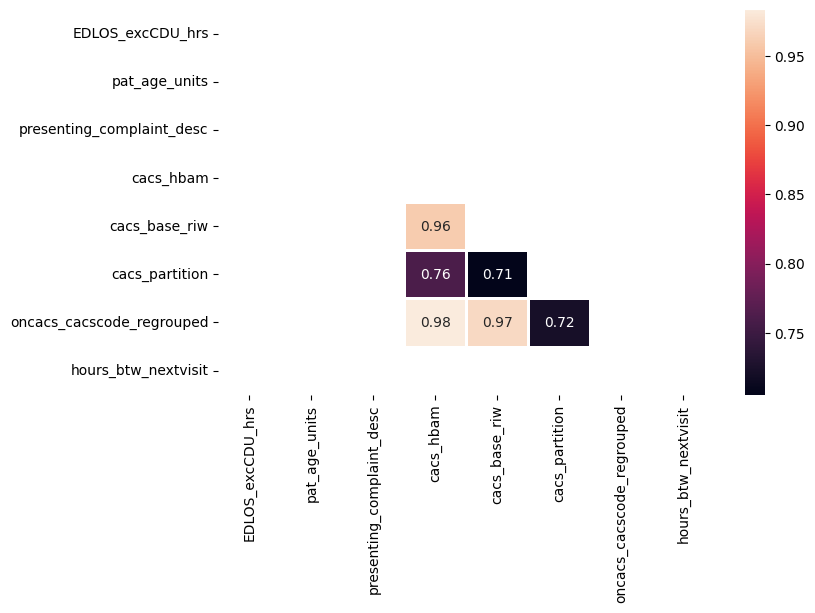

In [ ]:
# Set the figure size
plt.figure(figsize=(8,5))

# Compute the correlation matrix
corr_matrix = df_num.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with correlations greater than 0.7
sns.heatmap(corr_matrix[corr_matrix>0.7], annot=True, mask=mask, linewidths=2)

# Display the plot
plt.show()

<Figure size 1500x1500 with 0 Axes>

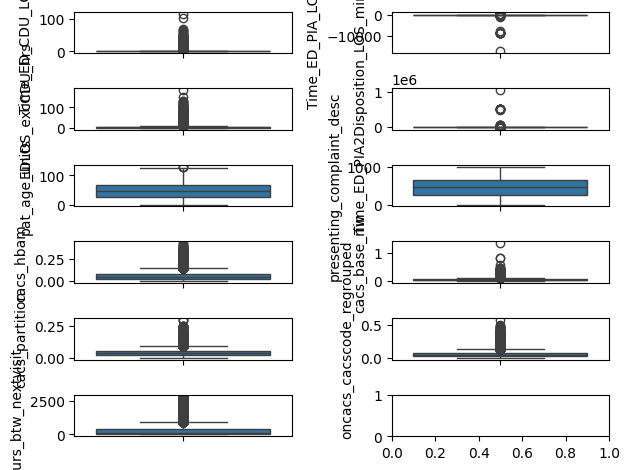

In [ ]:
# Box Plots (to identify outliers)

plt.figure(figsize=(20,20))
fig,subplots = plt.subplots(6,2)

for col,axis in zip(df_num.columns,subplots.flatten()):
    sns.boxplot(df_num[col],ax=axis)

plt.tight_layout()
plt.show()

In [ ]:
fig,subplots = plt.subplots(6,2, figsize=(20,15))

for col,axis in zip(df_num.columns,subplots.flatten()):
    sns.histplot(df_num[col],ax=axis, kde = True)

plt.tight_layout()
plt.show()

Scatterplot between Target (Time_ED_Total_LOS_hrs) and other numerical columns

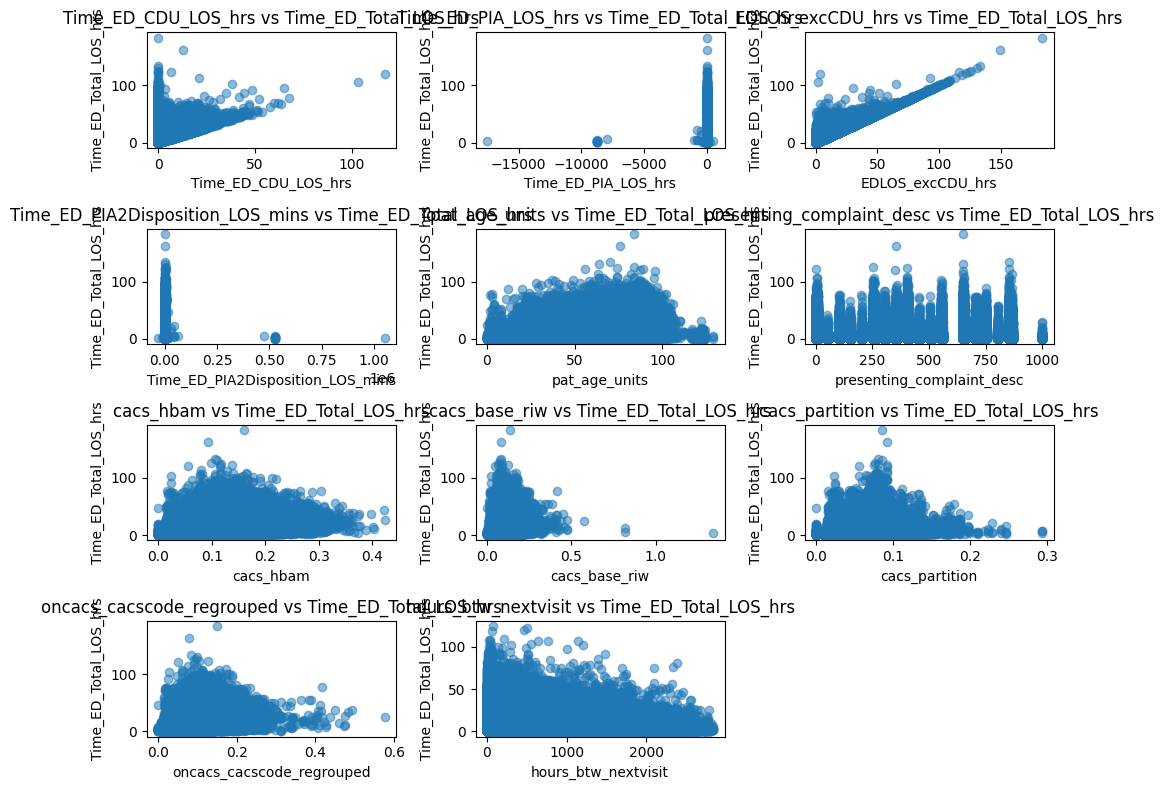

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Loop through each numerical column and create scatterplot against the target variable
for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i + 1)  # Adjust the subplot grid size as needed
    plt.scatter(df_num[col], df_target, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Time_ED_Total_LOS_hrs')
    plt.title(f'{col} vs Time_ED_Total_LOS_hrs')

plt.tight_layout()
plt.show()

CHECKING DISTRIBUTION OF THE TARGET VARIABLE

<ipython-input-22-3cb84733d47f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target, kde=True, ax=axes[0])


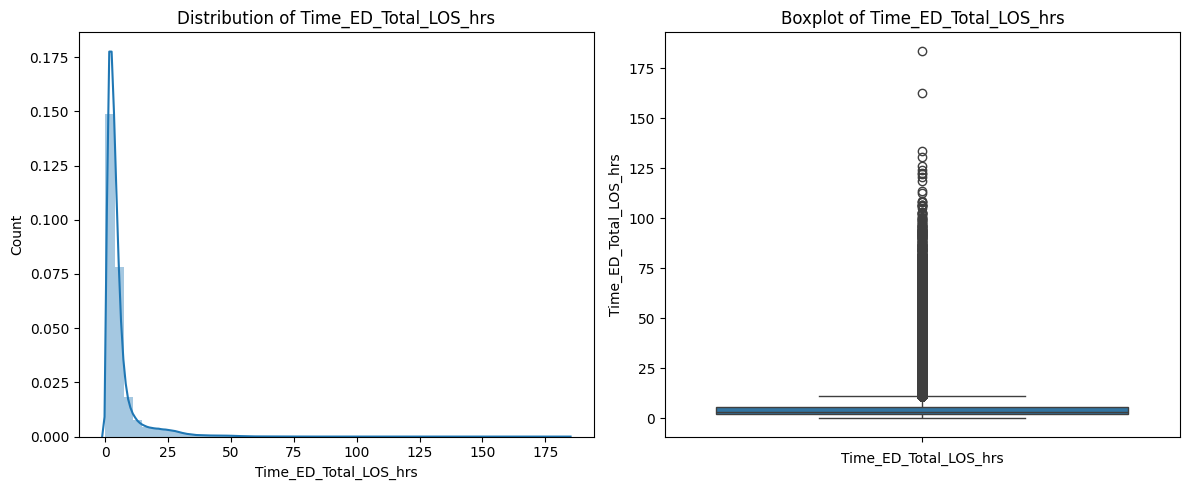

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "Time_ED_Total_LOS_hrs" column
sns.distplot(df_target, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Time_ED_Total_LOS_hrs")
axes[0].set_xlabel("Time_ED_Total_LOS_hrs")
axes[0].set_ylabel("Count")

# Boxplot plot for the "Time_ED_Total_LOS_hrs" column
sns.boxplot(data=df_target, y='Time_ED_Total_LOS_hrs',ax=axes[1])
axes[1].set_title("Boxplot of Time_ED_Total_LOS_hrs")
axes[1].set_xlabel("Time_ED_Total_LOS_hrs")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
#Removing outliers from target

In [ ]:
target = df_target.copy()

In [ ]:
# Calculate quartiles and IQR
Q1 = np.quantile(df_target, 0.25)
Q3 = np.quantile(df_target, 0.75)
IQR = Q3 - Q1

#Calculate upper and lower bounds
ul = Q3 + (IQR * 1.5)
ll = Q1 - (IQR * 1.5)

# Replace outliers with upper or lower bound
df_target = np.where((df_target) < ll, ll, df_target)
df_target = np.where((df_target) > ul, ul, df_target)

In [ ]:
df_target = pd.DataFrame(df_target, columns = ['Time_ED_Total_LOS_hrs'])
df_target.head()

,Time_ED_Total_LOS_hrs
0,4.716666
1,1.416666
2,5.366666
3,1.583333
4,7.566666


<ipython-input-32-52029199463b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target, kde=True, ax=axes[0])


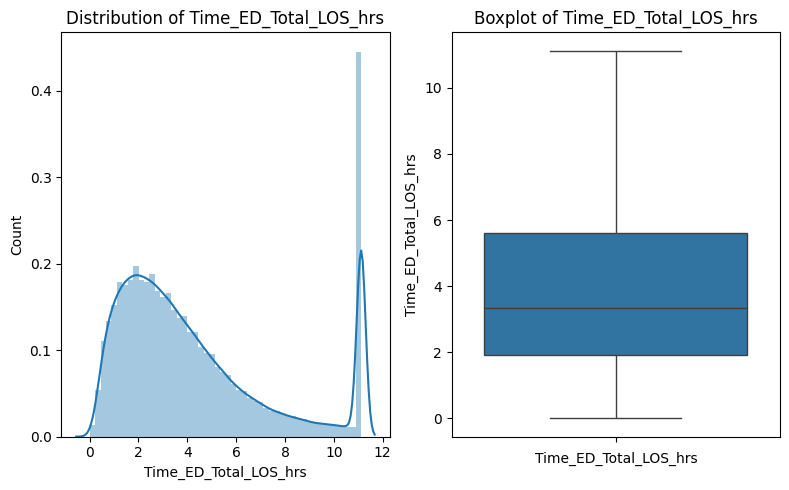

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(8,5))

# Distribution plot for the "Time_ED_Total_LOS_hrs" column
sns.distplot(df_target, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Time_ED_Total_LOS_hrs")
axes[0].set_xlabel("Time_ED_Total_LOS_hrs")
axes[0].set_ylabel("Count")

# Boxplot plot for the target column
sns.boxplot(data=df_target, y='Time_ED_Total_LOS_hrs',ax=axes[1])
axes[1].set_title("Boxplot of Time_ED_Total_LOS_hrs")
axes[1].set_xlabel("Time_ED_Total_LOS_hrs")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

PREPROCESSING

In [ ]:
df_num.head()

,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit
0,4.716666,17,403,0.0517,0.0440,0.0516,0.0440,448.0
1,1.416666,34,866,0.0640,0.0453,0.0639,0.0453,NaN
2,5.366666,38,251,0.1063,0.0899,0.0491,0.0899,1.0
3,1.583333,3,657,0.0203,0.0175,0.0202,0.0175,8.0
4,2.866666,66,301,0.1070,0.0913,0.0498,0.0913,212.0


In [ ]:
df_num.shape

(1389019, 8)

In [ ]:
## Transformation

In [ ]:
df_num.describe()

,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit
count,1.389019e+06,1.389019e+06,1.389019e+06,1.388584e+06,1.388584e+06,1.388584e+06,1.388589e+06,757861.000000
mean,5.191783e+00,4.617314e+01,4.406683e+02,5.803014e-02,5.063815e-02,4.044940e-02,5.279597e-02,296.371957
std,6.767755e+00,2.491339e+01,2.656042e+02,3.639784e-02,3.249615e-02,1.991504e-02,3.351385e-02,431.036961
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.900000e+00,2.600000e+01,2.510000e+02,2.920000e-02,2.560000e-02,2.430000e-02,2.640000e-02,16.000000
50%,3.300000e+00,4.600000e+01,4.550000e+02,4.740000e-02,3.960000e-02,3.730000e-02,4.170000e-02,114.000000
75%,5.383333e+00,6.600000e+01,6.530000e+02,7.760000e-02,6.630000e-02,4.980000e-02,6.980000e-02,388.000000
max,1.838500e+02,1.290000e+02,9.990000e+02,4.227000e-01,1.342800e+00,2.936000e-01,5.767000e-01,2844.000000


In [ ]:
# Initialize PowerTransformer objects with different methods
transformer1 = PowerTransformer(method = 'yeo-johnson')
transformer2 = PowerTransformer(method = 'box-cox')

df_transformed = pd.DataFrame(columns=df_num.columns,index=df_num.index)
for col in df_num.columns:

  # Apply box-cox transformation if all values in the column are positive
  if min(df_num[col]) > 0:
    df_transformed[col] = transformer2.fit_transform(np.array(df_num[col]).reshape(-1,1))

  # Apply Yeo-Johnson transformation if the column contains non-positive values
  else:
    df_transformed[col] = transformer1.fit_transform(np.array(df_num[col]).reshape(-1, 1))

In [ ]:
df_num.skew()

EDLOS_excCDU_hrs             4.072506
pat_age_units                0.065434
presenting_complaint_desc   -0.160565
cacs_hbam                    1.355095
cacs_base_riw                1.577383
cacs_partition               1.019348
oncacs_cacscode_regrouped    1.396727
hours_btw_nextvisit          2.258246
dtype: float64

In [ ]:
df_transformed.skew()

EDLOS_excCDU_hrs             0.010210
pat_age_units               -0.196755
presenting_complaint_desc   -0.592995
cacs_hbam                    0.195521
cacs_base_riw                0.241420
cacs_partition               0.178407
oncacs_cacscode_regrouped    0.229236
hours_btw_nextvisit         -0.088239
dtype: float64

In [ ]:
### Scaling

In [ ]:
ss = StandardScaler()
df_transformed_scaled = ss.fit_transform(df_transformed)
df_transformed_scaled = pd.DataFrame(data = df_transformed_scaled, columns=df_transformed.columns)
df_transformed_scaled.head()

,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit
0,0.457223,-1.174261,-0.000740,0.065739,0.049552,0.789630,-0.037040,0.872039
1,-1.004031,-0.409597,1.383281,0.461335,0.103917,1.242671,0.016191,NaN
2,0.606344,-0.245394,-0.553905,1.371149,1.335109,0.679833,1.256172,-1.615990
3,-0.871536,-1.979629,0.797100,-1.370852,-1.428585,-1.227353,-1.453210,-1.082350
4,-0.142999,0.806453,-0.362870,1.381859,1.359237,0.711253,1.281372,0.422997


In [ ]:
# Replace missing values in categorical columns with the mode (most frequent value)
df_transformed_scaled_imputed = df_transformed_scaled.fillna(df_transformed_scaled.mean())

# Print the DataFrame after imputation
df_transformed_scaled_imputed.head()

,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit
0,0.457223,-1.174261,-0.000740,0.065739,0.049552,0.789630,-0.037040,8.720395e-01
1,-1.004031,-0.409597,1.383281,0.461335,0.103917,1.242671,0.016191,3.750254e-17
2,0.606344,-0.245394,-0.553905,1.371149,1.335109,0.679833,1.256172,-1.615990e+00
3,-0.871536,-1.979629,0.797100,-1.370852,-1.428585,-1.227353,-1.453210,-1.082350e+00
4,-0.142999,0.806453,-0.362870,1.381859,1.359237,0.711253,1.281372,4.229972e-01


In [ ]:
Total = (df_transformed_scaled_imputed.isnull().sum()).sort_values(ascending=False)
Percentage = (df_transformed_scaled_imputed.isnull().sum()*100/df_transformed_scaled_imputed.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
EDLOS_excCDU_hrs,0,0.0
pat_age_units,0,0.0
presenting_complaint_desc,0,0.0
cacs_hbam,0,0.0
cacs_base_riw,0,0.0
cacs_partition,0,0.0
oncacs_cacscode_regrouped,0,0.0
hours_btw_nextvisit,0,0.0


CATEGORICAL

In [ ]:
df_cat.drop(['mrn'], inplace=True, axis=1)

In [ ]:
df_cat.shape

(1389019, 85)

In [ ]:
# Replace missing values in categorical columns with the mode (most frequent value)
df_categorical_imputed = df_cat.fillna(df_cat.mode().iloc[0])

# Print the DataFrame after imputation
df_categorical_imputed.head()

,FiscalYear,FiscalQuarterText,MonthNameAbbr,WeekDayAbbr,Flag_Weekend,hosp_inst_desc,site_cd,Campus,admit_amb_cd,admit_amb_desc,...,responsibility_payment_desc,res_region,visit_type,Consult_1_Provider cd,mac,oncacs_weight_regrouped,next_EDvisit_in14d_case,days_btw_nextvisit,next_EDvisit_MRDx_code,epic_csn
0,2016,Q1,Apr,Fri,N,Ambulatory Care-General-TSH,SHNG,General,N,No Ambulance WI,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001
1,2016,Q1,Apr,Fri,N,Ambulatory Care-General-TSH,SHNG,General,N,No Ambulance WI,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001
2,2016,Q1,Apr,Fri,N,Ambulatory Care-General-TSH,SHNG,General,G,Ground Ambulance Grace Y For Yes,...,1.0,0,1.0,0,2016.0,2016.0,1,1,1,2016001
3,2016,Q1,Apr,Fri,N,Ambulatory Care-General-TSH,SHNG,General,N,No Ambulance WI,...,1.0,1,1.0,0,2016.0,2016.0,1,1,0,2016001
4,2016,Q1,Apr,Fri,N,Ambulatory Care-General-TSH,SHNG,General,N,No Ambulance WI,...,1.0,1,1.0,0,2016.0,2016.0,0,0,0,2016001


In [ ]:
Total = (df_categorical_imputed.isnull().sum()).sort_values(ascending=False)
Percentage = (df_categorical_imputed.isnull().sum()*100/df_categorical_imputed.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
FiscalYear,0,0.0
CoderNumberDesc,0,0.0
PIA_case,0,0.0
CDU_case,0,0.0
triage_hour,0,0.0
...,...,...
referred_to_cd,0,0.0
referred_from_desc,0,0.0
referred_from_cd,0,0.0
shn_catchment_case,0,0.0


## Encoding

In [ ]:
# Initialize CatBoostEncoder object with categorical columns
encoder = ce.CatBoostEncoder(cols=df_categorical_imputed.columns)

# Fit the encoder on the categorical DataFrame and target variable
encoder = encoder.fit(X=df_categorical_imputed,y=df_target)

# Encode the categorical DataFrame
df_encode = encoder.transform(df_categorical_imputed)

In [ ]:
df_encode.head()

,FiscalYear,FiscalQuarterText,MonthNameAbbr,WeekDayAbbr,Flag_Weekend,hosp_inst_desc,site_cd,Campus,admit_amb_cd,admit_amb_desc,...,responsibility_payment_desc,res_region,visit_type,Consult_1_Provider cd,mac,oncacs_weight_regrouped,next_EDvisit_in14d_case,days_btw_nextvisit,next_EDvisit_MRDx_code,epic_csn
0,3.872055,4.191253,4.228183,4.344555,4.34758,4.033357,4.53436,4.534425,3.617646,3.617646,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401
1,3.872055,4.191253,4.228183,4.344555,4.34758,4.033357,4.53436,4.534425,3.617646,3.617646,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401
2,3.872055,4.191253,4.228183,4.344555,4.34758,4.033357,4.53436,4.534425,6.625179,6.625179,...,4.301824,4.066024,4.27758,3.642766,3.87192,3.87192,4.584064,4.425841,3.993107,3.713401
3,3.872055,4.191253,4.228183,4.344555,4.34758,4.033357,4.53436,4.534425,3.617646,3.617646,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.584064,4.425841,4.277264,3.713401
4,3.872055,4.191253,4.228183,4.344555,4.34758,4.033357,4.53436,4.534425,3.617646,3.617646,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401


In [ ]:
df_encode.shape

(1389019, 85)

MODEL

In [ ]:
df_HospitalDataset = pd.concat([df_transformed_scaled_imputed,df_encode], axis=1)
df_HospitalDataset.head()

,Unnamed: 0,EDLOS_excCDU_hrs,pat_age_units,presenting_complaint_desc,cacs_hbam,cacs_base_riw,cacs_partition,oncacs_cacscode_regrouped,hours_btw_nextvisit,Unnamed: 0,...,responsibility_payment_desc,res_region,visit_type,Consult_1_Provider cd,mac,oncacs_weight_regrouped,next_EDvisit_in14d_case,days_btw_nextvisit,next_EDvisit_MRDx_code,epic_csn
0,0,0.457223,-1.174261,-0.000740,0.065739,0.049552,0.789630,-0.037040,8.720395e-01,0,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401
1,1,-1.004031,-0.409597,1.383281,0.461335,0.103917,1.242671,0.016191,3.750254e-17,1,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401
2,2,0.606344,-0.245394,-0.553905,1.371149,1.335109,0.679833,1.256172,-1.615990e+00,2,...,4.301824,4.066024,4.27758,3.642766,3.87192,3.87192,4.584064,4.425841,3.993107,3.713401
3,3,-0.871536,-1.979629,0.797100,-1.370852,-1.428585,-1.227353,-1.453210,-1.082350e+00,3,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.584064,4.425841,4.277264,3.713401
4,4,-0.142999,0.806453,-0.362870,1.381859,1.359237,0.711253,1.281372,4.229972e-01,4,...,4.301824,4.294091,4.27758,3.642766,3.87192,3.87192,4.194246,4.236221,4.277264,3.713401


In [ ]:
X = df_HospitalDataset
y = df_target

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# using SKLearn - Linear Regression Method

# initialize the basic linear regression model
lr = LinearRegression()

# build the model - make the model learn
model_lr = lr.fit(X_train, y_train)

pred_train = model_lr.predict(X_train)
pred_test = model_lr.predict(X_test)

In [ ]:
# find thee r2 values

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print('r2 Train:', r2_train)
print('r2 Test:', r2_test)

r2 Train: 0.9482279172898016
r2 Test: 0.9479782159339245


In [ ]:
# also find rmse values
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE Train:', rmse_train)
print('RMSE Test:', rmse_test)

RMSE Train: 0.9805732868119016
RMSE Test: 5.198069143877216


Some other models

In [ ]:
from sklearn.linear_model import SGDRegressor

# Import Ridge regularization model
from sklearn.linear_model import Ridge

# Import Lasso regularization model
from sklearn.linear_model import Lasso

# Import Elastic Net regressor model
from sklearn.linear_model import ElasticNet

In [ ]:
linear = LinearRegression().fit(X_train,y_train)
stochastic = SGDRegressor(random_state=100).fit(X_train,y_train)
ridge = Ridge(alpha=5,random_state=100).fit(X_train,y_train)
lasso = Lasso(alpha=7,random_state=100).fit(X_train,y_train)
elasticnet = ElasticNet(alpha=2,l1_ratio=0.01,random_state=100).fit(X_train,y_train)

In [ ]:
models = [linear,stochastic,ridge,lasso,elasticnet]
performance = pd.DataFrame({"Model":models})
performance["R-square (train)"] = performance["Model"].apply(lambda model : r2_score(y_train,model.predict(X_train)))
performance["R-square (test)"] = performance["Model"].apply(lambda model : r2_score(y_test,model.predict(X_test)))
performance["RMSE (train)"] = performance["Model"].apply(lambda model : mean_squared_error(y_train,model.predict(X_train))**0.5)
performance["RMSE (test)"] = performance["Model"].apply(lambda model : mean_squared_error(y_test,model.predict(X_test))**0.5)

In [ ]:
# Round of the metrics to 4 decimal places
performance["R-square (train)"] = performance["R-square (train)"].apply(lambda a : str(round(a,4)))
performance["R-square (test)"] = performance["R-square (test)"].apply(lambda a : str(round(a,4)))
performance["RMSE (train)"] = performance["RMSE (train)"].apply(lambda a : str(round(a,4)))
performance["RMSE (test)"] = performance["RMSE (test)"].apply(lambda a : str(round(a,4)))

In [ ]:
# Display performance statistics for all models
performance

,Model,R-square (train),R-square (test),RMSE (train),RMSE (test)
0,LinearRegression(),0.8948,0.8943,1.0093,1.0133
1,SGDRegressor(random_state=100),-1677493228.3909,-1720265643.8188,127471.1652,129286.61
2,"Ridge(alpha=5, random_state=100)",0.8948,0.8943,1.0093,1.0133
3,"Lasso(alpha=7, random_state=100)",0.1674,0.1668,2.8399,2.8454
4,"ElasticNet(alpha=2, l1_ratio=0.01, random_stat...",0.7209,0.72,1.6442,1.6496


In [ ]:
# outliers
# PCA
# hyperparameter
# feature selection

PCA

In [ ]:
#pca

In [ ]:
from sklearn.decomposition import PCA
pca_df = PCA().fit(df_HospitalDataset)

In [ ]:
pca_df.explained_variance_

array([4.65189339e+01, 8.26511553e+00, 4.89381924e+00, 3.55015529e+00,
       3.21151180e+00, 2.61271608e+00, 2.39470457e+00, 2.03724043e+00,
       1.75840203e+00, 1.48691625e+00, 1.23571452e+00, 1.11411164e+00,
       1.07659399e+00, 9.18103629e-01, 8.59086439e-01, 7.79282096e-01,
       6.15848159e-01, 5.58951743e-01, 5.30869898e-01, 4.93237390e-01,
       4.65102676e-01, 4.48570022e-01, 3.57804998e-01, 3.15517241e-01,
       2.29102131e-01, 2.24589746e-01, 1.86434401e-01, 1.40175710e-01,
       1.33459217e-01, 1.30693205e-01, 1.15143787e-01, 1.05494276e-01,
       1.02633812e-01, 8.65317960e-02, 8.30128188e-02, 7.95460809e-02,
       7.34841517e-02, 7.15816375e-02, 4.90398589e-02, 4.44639042e-02,
       3.99637781e-02, 3.90861964e-02, 3.82621660e-02, 3.43721523e-02,
       3.09137465e-02, 2.03344428e-02, 1.89030293e-02, 1.43966794e-02,
       1.35999408e-02, 1.32584920e-02, 1.06218442e-02, 1.03100683e-02,
       9.90077024e-03, 9.29782895e-03, 7.66925638e-03, 7.47396834e-03,
      

In [ ]:
#pca_df.components_

In [ ]:
pca_df.n_components_

94

In [ ]:
var = np.cumsum(np.round(pca_df.explained_variance_ratio_, decimals=3)*100)
var

array([52.4, 61.7, 67.2, 71.2, 74.8, 77.7, 80.4, 82.7, 84.7, 86.4, 87.8,
       89.1, 90.3, 91.3, 92.3, 93.2, 93.9, 94.5, 95.1, 95.7, 96.2, 96.7,
       97.1, 97.5, 97.8, 98.1, 98.3, 98.5, 98.7, 98.8, 98.9, 99. , 99.1,
       99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

In [ ]:
#13 components can capture 90% variation

In [ ]:
pca_df_new = PCA(n_components=13)
# always done on scaled data
data_reduced = pca_df_new.fit_transform(df_HospitalDataset)
data_reduced.transpose()

array([[-1.76945753, -3.17870382,  0.32788646, ..., 15.13958787,
        -0.16931132, -5.4551327 ],
       [-0.63875947, -1.44903814,  5.02961742, ..., -6.9992619 ,
         2.42536238, -4.10794964],
       [-3.44982278,  0.43092597, -2.45749031, ..., -1.27696957,
        -0.24045435,  0.50005628],
       ...,
       [ 0.52718869,  0.03769153, -0.28917045, ...,  2.97898761,
         0.43450848,  1.30802515],
       [-0.02923322, -0.09425033, -0.33591534, ..., -1.60748132,
         0.35633958, -0.30119027],
       [ 0.58753859,  0.78463388, -0.53170523, ..., -2.37993994,
        -0.3815037 ,  0.99993321]])

In [ ]:
pca_df_new = pd.DataFrame(data_reduced)
pca_df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.769458,-0.638759,-3.449823,0.696956,-0.098629,0.042248,0.056023,-0.294801,-0.551531,-0.474432,0.527189,-0.029233,0.587539
1,-3.178704,-1.449038,0.430926,-1.284067,0.097947,-0.104021,2.920386,-0.543533,-1.198933,-2.423410,0.037692,-0.094250,0.784634
2,0.327886,5.029617,-2.457490,2.772074,3.983661,-1.439393,0.359702,-1.763465,-0.311131,0.422211,-0.289170,-0.335915,-0.531705
3,-5.521792,-3.859815,-1.097873,1.221856,1.162302,-0.023271,-0.693478,0.220604,0.225277,1.274839,0.331693,-0.333455,0.665164
4,-0.157095,4.802281,-1.858285,-2.561622,2.425375,-0.638303,0.447639,6.757472,-3.814308,2.359229,0.429800,-0.225036,-0.579184


In [ ]:
pca_df_new.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                   'PC10','PC11','PC12']
pca_df_new.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.769458,-0.638759,-3.449823,0.696956,-0.098629,0.042248,0.056023,-0.294801,-0.551531,-0.474432,0.527189,-0.029233,0.587539
1,-3.178704,-1.449038,0.430926,-1.284067,0.097947,-0.104021,2.920386,-0.543533,-1.198933,-2.423410,0.037692,-0.094250,0.784634
2,0.327886,5.029617,-2.457490,2.772074,3.983661,-1.439393,0.359702,-1.763465,-0.311131,0.422211,-0.289170,-0.335915,-0.531705
3,-5.521792,-3.859815,-1.097873,1.221856,1.162302,-0.023271,-0.693478,0.220604,0.225277,1.274839,0.331693,-0.333455,0.665164
4,-0.157095,4.802281,-1.858285,-2.561622,2.425375,-0.638303,0.447639,6.757472,-3.814308,2.359229,0.429800,-0.225036,-0.579184


In [ ]:
pca_df_new.to_csv("pca_df_new.csv")

In [ ]:
!cp /content/pca_df_new.csv /content/drive/MyDrive/Hospital/

In [ ]:
pca_df_new = pd.read_csv('/content/drive/MyDrive/Hospital/pca_df_new.csv', index_col = 0)
pca_df_new.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.769458,-0.638759,-3.449823,0.696956,-0.098629,0.042248,0.056023,-0.294801,-0.551531,-0.474432,0.527189,-0.029233,0.587539
1,-3.178704,-1.449038,0.430926,-1.284067,0.097947,-0.104021,2.920386,-0.543533,-1.198933,-2.423410,0.037692,-0.094250,0.784634
2,0.327886,5.029617,-2.457490,2.772074,3.983661,-1.439393,0.359702,-1.763465,-0.311131,0.422211,-0.289170,-0.335915,-0.531705
3,-5.521792,-3.859815,-1.097873,1.221856,1.162302,-0.023271,-0.693478,0.220604,0.225277,1.274839,0.331693,-0.333455,0.665164
4,-0.157095,4.802281,-1.858285,-2.561622,2.425375,-0.638303,0.447639,6.757472,-3.814308,2.359229,0.429800,-0.225036,-0.579184


PCA helps in eliminating multicollinearity

In [ ]:
corr = pca_df_new.corr()
corr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PC0,1.000000e+00,3.607637e-17,-3.845120e-16,3.866135e-16,-1.273890e-15,8.685955e-16,2.684939e-16,-4.265365e-16,-1.163849e-16,1.407795e-15,4.752081e-16,-1.584193e-15,-1.115742e-15
PC1,3.607637e-17,1.000000e+00,1.075303e-16,4.794950e-19,-2.662323e-16,-9.476621e-16,4.296981e-16,-2.217547e-16,1.686954e-17,-1.738329e-16,-1.061133e-15,-4.039461e-16,4.445682e-17
PC2,-3.845120e-16,1.075303e-16,1.000000e+00,1.671339e-16,-2.937325e-17,1.942923e-16,3.718757e-16,-6.299912e-17,5.303348e-16,-4.637634e-16,-1.101548e-16,3.215527e-16,5.817349e-19
PC3,3.866135e-16,4.794950e-19,1.671339e-16,1.000000e+00,-3.727543e-16,-2.278371e-16,2.345829e-16,4.339782e-16,8.224693e-17,2.705418e-16,1.588323e-16,-2.192473e-16,-1.924081e-16
PC4,-1.273890e-15,-2.662323e-16,-2.937325e-17,-3.727543e-16,1.000000e+00,-3.453009e-15,3.328673e-16,1.997961e-16,-5.954934e-16,-4.467121e-16,-1.498776e-16,1.218487e-16,9.658029e-16
PC5,8.685955e-16,-9.476621e-16,1.942923e-16,-2.278371e-16,-3.453009e-15,1.000000e+00,1.181880e-15,1.028190e-15,-2.805455e-17,-2.320983e-15,-7.244592e-16,-2.357519e-16,2.828895e-16
PC6,2.684939e-16,4.296981e-16,3.718757e-16,2.345829e-16,3.328673e-16,1.181880e-15,1.000000e+00,-4.397152e-16,-1.428105e-16,6.905576e-17,-3.332498e-16,3.993024e-16,-1.033144e-15
PC7,-4.265365e-16,-2.217547e-16,-6.299912e-17,4.339782e-16,1.997961e-16,1.028190e-15,-4.397152e-16,1.000000e+00,-1.058911e-15,5.403033e-16,4.412247e-16,4.020426e-16,-1.998400e-16
PC8,-1.163849e-16,1.686954e-17,5.303348e-16,8.224693e-17,-5.954934e-16,-2.805455e-17,-1.428105e-16,-1.058911e-15,1.000000e+00,5.071752e-16,-1.376044e-16,-1.047376e-17,-9.856729e-16
PC9,1.407795e-15,-1.738329e-16,-4.637634e-16,2.705418e-16,-4.467121e-16,-2.320983e-15,6.905576e-17,5.403033e-16,5.071752e-16,1.000000e+00,-5.113740e-17,1.962178e-16,2.165872e-16


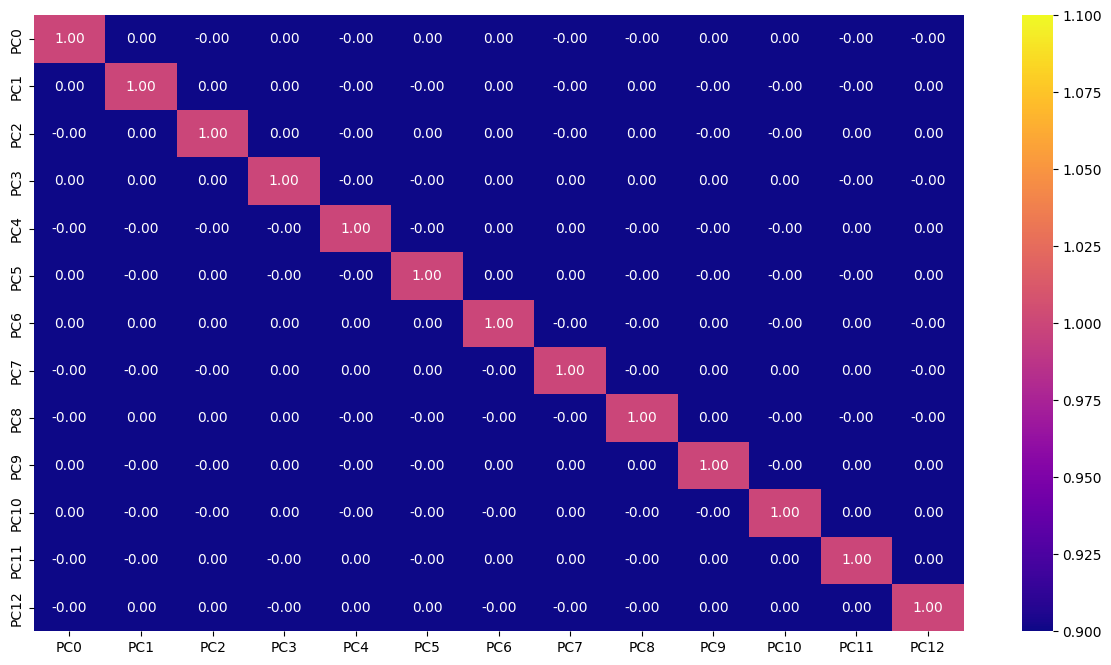

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='plasma', vmin=1, vmax=1)
plt.show()

we can see all multicollinearity has come to 0

In [ ]:
X = pca_df_new
y = df_target

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# using SKLearn - Linear Regression Method

# initialize the basic linear regression model
lr = LinearRegression()

# build the model - make the model learn
model_lr = lr.fit(X_train, y_train)

pred_train = model_lr.predict(X_train)
pred_test = model_lr.predict(X_test)

In [ ]:
# find the r2 values

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print('r2 Train:', r2_train)
print('r2 Test:', r2_test)

r2 Train: 0.6723767611198295
r2 Test: 0.6721751357305564


In [ ]:
# also find rmse values
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE Train:', rmse_train)
print('RMSE Test:', rmse_test)

RMSE Train: 1.7814306387586099
RMSE Test: 1.7847473053189273


Other models with PCA

In [ ]:
from sklearn.linear_model import SGDRegressor

# Import Ridge regularization model
from sklearn.linear_model import Ridge

# Import Lasso regularization model
from sklearn.linear_model import Lasso

# Import Elastic Net regressor model
from sklearn.linear_model import ElasticNet

In [ ]:
linear = LinearRegression().fit(X_train,y_train)
stochastic = SGDRegressor(random_state=100).fit(X_train,y_train)
ridge = Ridge(alpha=5,random_state=100).fit(X_train,y_train)
lasso = Lasso(alpha=7,random_state=100).fit(X_train,y_train)
elasticnet = ElasticNet(alpha=2,l1_ratio=0.01,random_state=100).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
models = [linear,stochastic,ridge,lasso,elasticnet]
performance = pd.DataFrame({"Model":models})
performance["R-square (train)"] = performance["Model"].apply(lambda model : r2_score(y_train,model.predict(X_train)))
performance["R-square (test)"] = performance["Model"].apply(lambda model : r2_score(y_test,model.predict(X_test)))
performance["RMSE (train)"] = performance["Model"].apply(lambda model : mean_squared_error(y_train,model.predict(X_train))**0.5)
performance["RMSE (test)"] = performance["Model"].apply(lambda model : mean_squared_error(y_test,model.predict(X_test))**0.5)

In [ ]:
# Round of the metrics to 4 decimal places
performance["R-square (train)"] = performance["R-square (train)"].apply(lambda a : str(round(a,4)))
performance["R-square (test)"] = performance["R-square (test)"].apply(lambda a : str(round(a,4)))
performance["RMSE (train)"] = performance["RMSE (train)"].apply(lambda a : str(round(a,4)))
performance["RMSE (test)"] = performance["RMSE (test)"].apply(lambda a : str(round(a,4)))

In [ ]:
# Display performance statistics for all models
performance

,Model,R-square (train),R-square (test),RMSE (train),RMSE (test)
0,LinearRegression(),0.6724,0.6722,1.7814,1.7847
1,SGDRegressor(random_state=100),0.6697,0.6698,1.7887,1.7912
2,"Ridge(alpha=5, random_state=100)",0.6724,0.6722,1.7814,1.7847
3,"Lasso(alpha=7, random_state=100)",0.4069,0.4058,2.3969,2.4029
4,"ElasticNet(alpha=2, l1_ratio=0.01, random_stat...",0.6481,0.6473,1.8462,1.8512


Random Forest Regressor - PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=0)

In [ ]:
rfr.fit(X_train, y_train)
print('Score for the training data:', rfr.score(X_train, y_train))
print('Score for the test data:'    , rfr.score(X_test, y_test))

<ipython-input-33-0b268e051fa0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


Score for the training data: 0.967056051285772
Score for the test data: 0.7646069700923874


In [ ]:
# calculate rmse
print('RMSE for Train-RF:',np.sqrt(mean_squared_error(y_train, rfr.predict(X_train))))
print('RMSE for Test-RF:'    , np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))))

RMSE for Train-RF: 0.5648971638888847
RMSE for Test-RF: 1.512350970670823


In [ ]:
# create GridSearch for random forest to fine tune the performance of the model
param_grid = {
    'max_depth'        : [7,10],
    'min_samples_leaf' : [3,13,30],
    'min_samples_split': [30,50,100],
    'max_features'     : [4,6],
    'n_estimators'     : [300,500]     # 'n_estimators' - no of trees
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor(random_state = 123)
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_)

In [ ]:
#### rfr = RandomForestRegressor(max_depth = 10,
                            max_features = 6,
                            min_samples_leaf = 3,
                            min_samples_split = 30, n_estimators = 300,
                            random_state = 0)

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
print('Score for training data-RF: ', rfr.score(X_train, y_train))
print('Score for test data-RF: ', rfr.score(X_test, y_test))

In [ ]:
print('RMSE for train-RF: ', np.sqrt(mean_squared_error(y_train, rfr.predict(X_train))))
print('RMSE for test-RF: ', np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))))

### **Stochastic Gradient Descent Model**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()

In [ ]:
sgd.fit(X_train, y_train)

In [ ]:
print('Score for training data -SGD: ', sgd.score(X_train, y_train))
print('Score for test data-SGD: ', sgd.score(X_test, y_test))

In [ ]:
print('RMSE for train data: ', np.sqrt(mean_squared_error(y_train, sgd.predict(X_train))))
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, sgd.predict(X_test))))

In [ ]:
# use GridSearchCV to fine tune the performance of the model
param_grid = {'l1_ratio' : [0.1, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.25],
              'penalty'  : ['l1','l2','elasticnet'],
              'loss'     : ['squared_error'],
              'alpha'    : [0.1, 0.2, 0.3,0.9, 1,2,3,4,5,6,7,8,9,10]
              }

In [ ]:
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
#update with best parameters obtained
sgd = SGDRegressor( l1_ratio = 0.3,
    alpha = 2,
    penalty = 'elasticnet',
    loss = 'squared_error'
)

In [ ]:
sgd.fit(X_train, y_train)

In [ ]:
print('Score for train data - SGD: ', sgd.score(X_train, y_train))
print('Score for test data - SGD: ', sgd.score(X_test, y_test))

In [ ]:
print('RMSE for train data-SGD: ', np.sqrt(mean_squared_error(y_train, sgd.predict(X_train))))
print('RMSE for test data-SGD: ', np.sqrt(mean_squared_error(y_test, sgd.predict(X_test))))

### **Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm = GradientBoostingRegressor()

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
print('RMSE for train data-GBM: ', np.sqrt(mean_squared_error(y_train, gbm.predict(X_train))))
print('RMSE for test data-GBM: ', np.sqrt(mean_squared_error(y_test, gbm.predict(X_test))))

In [ ]:
# using GridSearchCV to fine tune the performance

param_grid = {
    'n_estimators'      : [100, 200, 300],
    'learning_rate'     : [0.1, 0.01],
    'loss'              : ['squared_error'],
    'criterion'         : ['friedman_mse','squared_error'],
    'min_samples_split' : [30,50,100]
}

In [ ]:
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, cv = 3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
gbm = GradientBoostingRegressor(
    criterion = 'friedman_mse',
    learning_rate = 0.1,
    n_estimators = 300,
    min_samples_split = 100,
    loss = 'squared_error'
)

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
print('RMSE for train data-GBM: ', np.sqrt(mean_squared_error(y_train, gbm.predict(X_train))))
print('RMSE for test data-GBM: ', np.sqrt(mean_squared_error(y_test, gbm.predict(X_test))))

### **XTreme Gradient Boosting Model**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
print('RMSE for train data-XGB: ', np.sqrt(mean_squared_error(y_train, xgb.predict(X_train))))
print('RMSE for test data-XGB: ', np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))))

In [ ]:
param_grid = {
    'n_estimators'      : [100, 200, 300],
    'learning_rate'     : [0.1],
    'colssample_bytree' : [0.5, 0.8],          # take 50%/80% of the total features we have
    'max_depth'         : [2,4,6]
}

In [ ]:
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv=3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
#update #################3
xgb = XGBRegressor(n_estimators = 300,
                   learning_rate = 0.1,
                   colssample_bytree = 0.5,
                   max_depth = 2)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
print('RMSE for train data-XGB: ', np.sqrt(mean_squared_error(y_train, xgb.predict(X_train))))
print('RMSE for test data-XGB: ', np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))))